In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ANALIZA PODATKOV O OGLASIH ZA DELO NA E-ŠTUDENTSKEM SERVISU

Uvod v programiranje, seminarska naloga, 28.8.2025
Ana Raspet

V nadaljevanju sledi analiza podatkov o oglasih za delo ki so trenutn na voljo na e-študentskem servisu. Podatki so bili pridobljeni iz spletne strani e-študentski servis, ki je dostopna na: https://www.studentski-servis.com. 

PODATKI:
Podatki ki so uporabljeni v tem poročilu so na voljo vsem uporabnikom spletne strani e-študentski servis,  brez potrebne registracije ali prijave na samem portalu. Podatke sem s pomočjo orodji in knjižnic, ki so na voljo v programskem jeziku python upsešno izluščila iz same html kode spletne strani e-študentski servis. Podatke sem, po tem ko sem jih uzpešno izluščila iz same kode, še dodatno uredila in jih shranila tako v .json kot tudi .csv datoteki, ki sta pripravljeni za nadaljno obdelavo in analizo. Podatki ki jih lahko najdemo v .json in .csv datotekah ki imata obe naslov podatki_dela so sledeči:
    PODATKI: 
        - VRSTA DELA: Podatek o tem za kakšno vrsto dela gre. ta podatek ima omejeno število kategorij. posamezna kategorija se pojavi pri več različnih oglasih, in omogoča grupiranje oglasoh po posamezni kategoriji.
        - NASLOV OGLASA: nekoliko bolj podrobna definicija dela pri posameznem oglasu. Precej več različnih možnosti kot pri vrsti dela. Tukaj predvidevam da naročnik ni omejen z nekim fiksnim naborom možnosti kot na primer pri vrsti dela ampak je lahko naslov oglasa kar koli.
        - KRAJ: določa v katerm kraju oz. regiji se bo delo na ogalsu izvajalo
        - PLAČILO: določa neto znesek višine plačila. Tukaj sem ohranila le neto vrednost, saj se mi zdi za študente bolj zanimiv podatek saj nam pove točen znesek ki ga bo študent prejel na svoj račun za eno uro opravljenega dela.
        - PROSTA MESTA: določa koliko prstih delovnih mest ima določen oglas. 
        - TRAJANJE: določa kako dolgo se bo določeno delo na ogalsu izvajalo. tukaj imamo tako kot pri vrsti dela omejen nabor možnosti ki jih naročnik oglasa lahko izbere
        - DELOVNIK: določa kakšen delovnih posamezne oglas zahteve: popoldan, dopoldan,...Tudi tukaj imamo omejen nabor možnosti
        - ZAČETEK DELA: datumsko določa kdaj se bo delo na posameznemu ogalsu pričelo izvajati.

V nadaljevanju sem poizkušala podatke analizirati na kar se da zanimiv in izviren način. rezultet sem nato prikazala s pomočjo različnih tabel in vizualizacij tako da so ugotovitve hitro in jasno vidne na samih vizualizacijah. 

1: POVPREČNO PLAČILO

Prvo kar me je zanimalo pri mojih podatkih je bilo seveda to kje in kako lahko kot študentka največ zaslužim. Odločila sem se da preverim katera vrsta dela je najbolje plačana in v kateri regiji je takih del največ. Poleg tega me je zanimalo tudi v kateri regiji oziroma kraju je povprečno plačilo najvišje in ali se bom za boljši zaslužek morda morala preseliti na drugo stran države. 

Na spodnji vizualizaciji sem najprej predstavila posamezne vrste dela razvrščene glede na višino plačila. To sem storila tako da sem podatke v moji .csv datoteki najprej grupirala glede na vrsto dela, nato pa za vsako grupo posebej izračunala povprečno višino plačila v tej grupi. Rezultati so prikazani na dveh grafih spodaj. zaradi velike količine del sem se odločila da prikažem le posebej 10 najbolje plačanih del in posebej 10 najslabše plačanih del. Kot lahko vidimo iz podatkov lahko precej zaslužimo z deli kot so statist, trener, vodja, maskota,... Definitivno pa se nam ne splača nakladati in razkladati različnih predmetov.

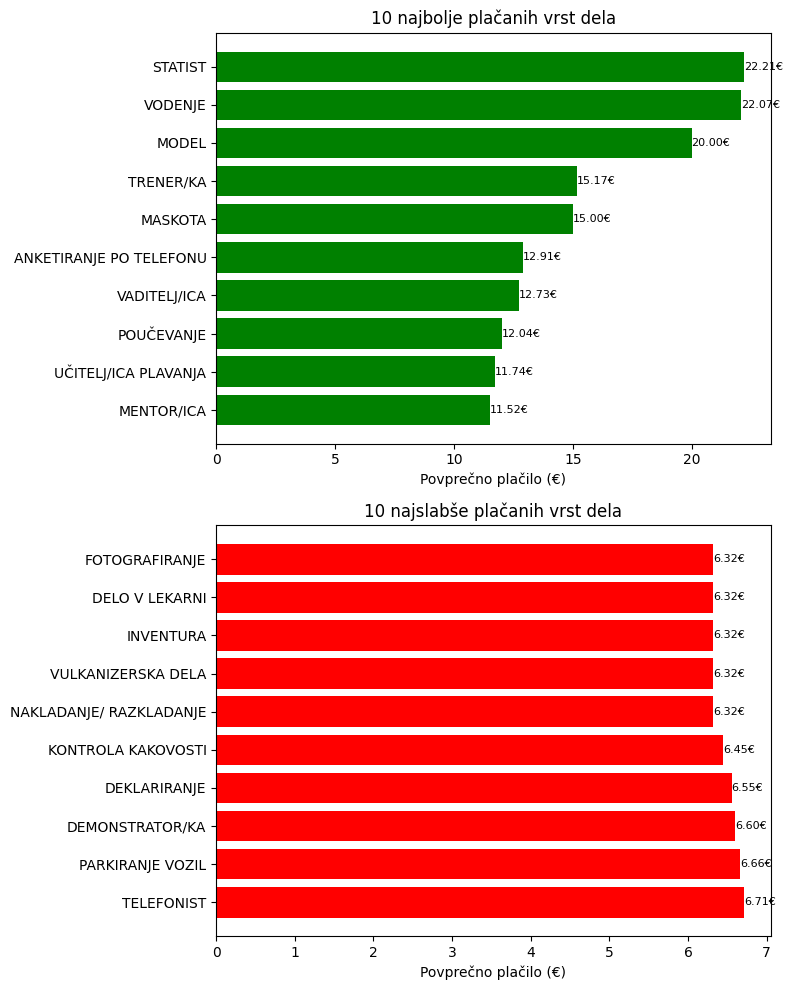

In [28]:

# Branje podatkov iz CSV datoteke
df = pd.read_csv('podatki_dela.csv')

df['Placilo'] = pd.to_numeric(df['Placilo'])

# Grupiranje podatkov po Vrsta dela in izračun povprečne vrednosti plačila
povprecna_placila = df.groupby('Vrsta dela')['Placilo'].mean()

# Branje podatkov iz CSV datoteke
df = pd.read_csv('podatki_dela.csv')

df['Placilo'] = pd.to_numeric(df['Placilo'])

# Grupiranje podatkov po Vrsta dela in izračun povprečne vrednosti plačila
povprecna_placila = df.groupby('Vrsta dela')['Placilo'].mean()

# Sortiranje od največjega do najmanjšega plačila
top_10 = povprecna_placila.sort_values(ascending=False).head(10).sort_values(ascending=True)
bottom_10 = povprecna_placila.sort_values(ascending=True).head(10).sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Top 10 najbolje plačanih
ax1.barh(range(len(top_10)), top_10.values, color='green')
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels(top_10.index)
ax1.set_xlabel('Povprečno plačilo (€)')
ax1.set_title('10 najbolje plačanih vrst dela')

for i, value in enumerate(top_10.values):
    ax1.text(value, i, f'{value:.2f}€', va='center', fontsize=8)

# Bottom 10 najslabše plačanih
ax2.barh(range(len(bottom_10)), bottom_10.values, color='red')
ax2.set_yticks(range(len(bottom_10)))
ax2.set_yticklabels(bottom_10.index)
ax2.set_xlabel('Povprečno plačilo (€)')
ax2.set_title('10 najslabše plačanih vrst dela')

for i, value in enumerate(bottom_10.values):
    ax2.text(value, i, f'{value:.2f}€', va='center', fontsize=8)

plt.tight_layout()
plt.show()

Pri sledečem delu sem se odločila da želim prikazati v katere kraje v Sloveniji se je vredno preseliti če želiš preko e-študentskega servisa zaslužiti kar se da veliko. Ker ima zalo veliko krajev v Sloveniji manj kot 10 oglasov sem se odločila da se bom zaradi verjetno precej velike konkurecne pri prijavi na delo v takih krajih osredotočila le na tiste ki imajo 10 ali več oglasov in kjer je verjetnost da dobimo delo nekoliko boljša. Seznam teh krajev in povprečnega plačila v posameznem kraju je viden na spodnji vizualizaciji. 
Glede na ugotovljeno sem se odločila da se zaradi dela ne bom preselila iz Ljubljane, bom pa si morda omislila letno avtobusno vozovnico do Medvod in dela ne bom več iskala v centru. Če pa bi si že zaželela spremembe okolja se sigurno ne bi odpravila v smeri Trbovelj.

In [29]:
df = pd.read_csv('podatki_dela.csv')
kraj_counts = df.groupby('Kraj').size()
kraj_stats = df.groupby('Kraj').agg({'Placilo': 'mean', 'Kraj': 'count'}).rename(columns={'Kraj': 'ŠT. OGLASOV', 'Placilo': 'PLACILO'}).rename_axis('KRAJ')
kraj_stats = kraj_stats.reset_index()
filtrirani_kraji = kraj_stats[kraj_stats['ŠT. OGLASOV'] >= 10].sort_values('PLACILO', ascending=False)
pd.set_option('display.max_rows', None)
print(f"Kraji z več kot 10-timi oglasi")
print(f"Število krajev ki imajo več oglasov kot mediana: {len(filtrirani_kraji)}")
print("\n")
print(filtrirani_kraji.round({'PLACILO': 2}).to_string(index=False))

Kraji z več kot 10-timi oglasi
Število krajev ki imajo več oglasov kot mediana: 31


         KRAJ  PLACILO  ŠT. OGLASOV
      MEDVODE    12.01           10
      VELENJE    10.10           13
KRANJSKA GORA     9.32           18
       ŠENČUR     9.12           10
     PORTOROŽ     9.03           28
      KOMENDA     8.94           13
 PO SLOVENIJI     8.93           10
        KRANJ     8.66           49
       KAMNIK     8.65           27
    GROSUPLJE     8.62           17
        TRZIN     8.61           16
         BLED     8.59           17
        PIRAN     8.57           11
      VRHNIKA     8.54           11
      DOMŽALE     8.42           20
    LJUBLJANA     8.26          777
      LOGATEC     7.99           14
     JESENICE     7.98           13
  ŠKOFJA LOKA     7.92           15
        KOPER     7.91           72
         PTUJ     7.84           18
       SEŽANA     7.82           14
      MARIBOR     7.71          113
        CELJE     7.62           42
     POSTOJNA  

2. NAJBOLJ ISKANA DELA

Pri tem delu sem se osredotočila na iskanje najbolj željenih del. Zanimalo me je kakšen kader je trenutno na trgu najbolj zaželjen in pa kje v sloveniji je povpraševanje po takem kadru največje, oziroma kje je za določeno željeno delo na voljo največ delovnih mest.

Na spodnji vizualizacije sem tako kot pri analizi plačila prikazala 10 najbolj in 10 najmanj iskanih kadrov na trgu. 10 najmanj iskanih del sem le izpisala, saj imajo vsi le en olgas in eno prosto mesto in se mi prikaz v grafu ni zdel preveč smiseln. Če sem prej želela ugotoviti s čim bi se bilo najbolje ukvarjati da bi kar največ zaslužila me je tukaj zanimalo bolj to kaj je dobro znati in kje iskati delo, da boš le to lahko kar se da z lahkoto našel in začel čim prej delati ne glede na višino plačila. Podatke sem grupirala po vrsti dela in izračunala skupno število prostih delovnih mest. Te podatke sem nato sortirala po količini prostih delovnih mest in prikazala 10 najbolj in 10 najmanj iskanih. Nato sem podobno naredila še za iskanje krajev kjer so ta delovna mesta na voljo. Tukaj sem osnovno tabelo z oglasi najprej filtrirala tako da sem ohranila samo oglase kjer je vrsta dela ena od 10 najbolj iskanih ki sem jih določila pred tem. dobljeno filtrirano tabelo sem nato grupirala po krajih in preštela vsa dela v posameznem kraju. Rezultate sem uredila po velikosti in prikazala 10 krajev ki ponujajo največ del za katere vemo da so na trgu najbolj iskana. tako dobimo 10 krajev kjer je možnost da se zaposlimo zelo visoka saj lahko v teh krajih najdemo veliko del z visoko ponudbo delovnih mest.

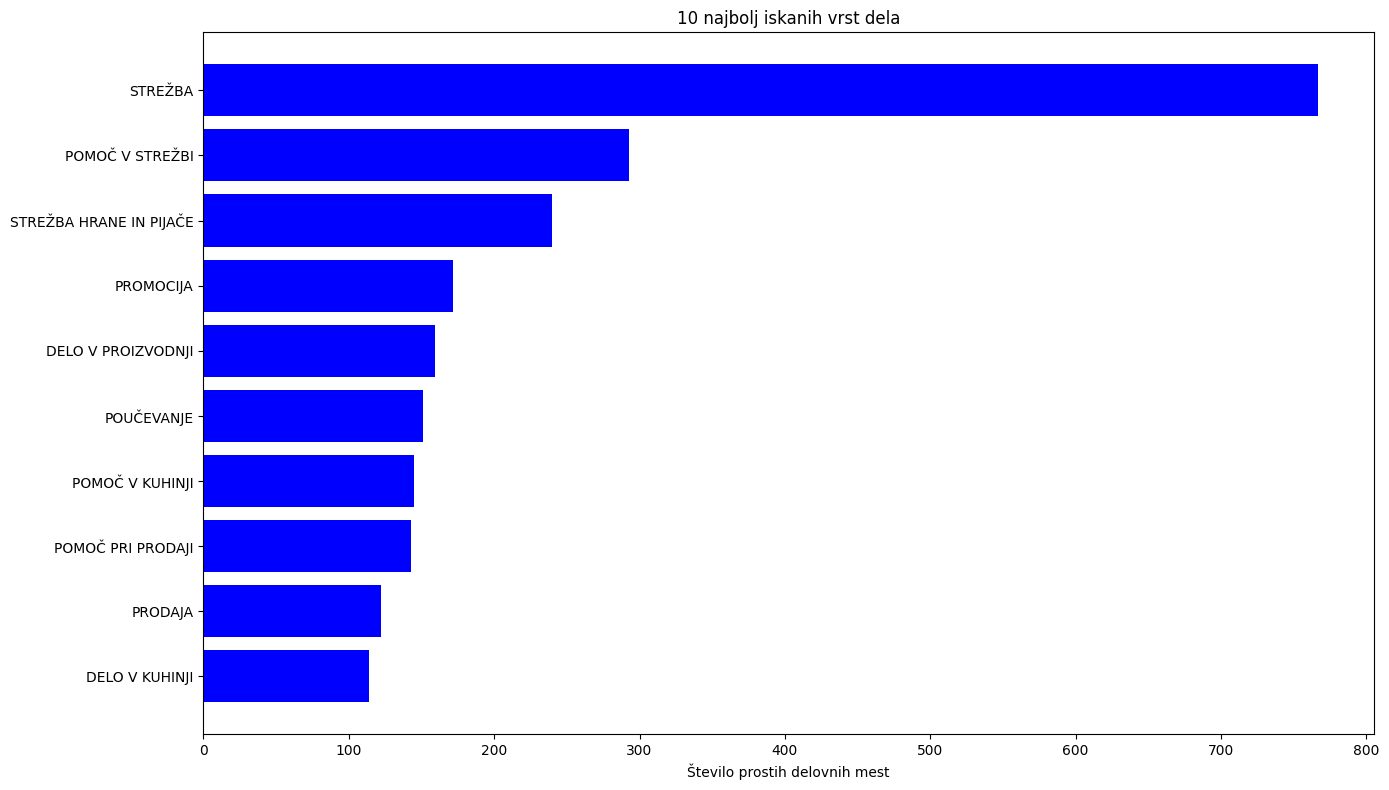

NAJMANJ ISKANA DELA: 

NAKLADANJE/ RAZKLADANJE
FOTOGRAFIRANJE
KONTROLA KAKOVOSTI
TAJNIŠKA DELA
VNOS PODATKOV V RAČUNALNIK
DELO V LOTERIJI
DELO V FARMACIJI
POMOČ V SKLADIŠČU IN PROD. CENTRIH
VULKANIZERSKA DELA
PREDAVANJE


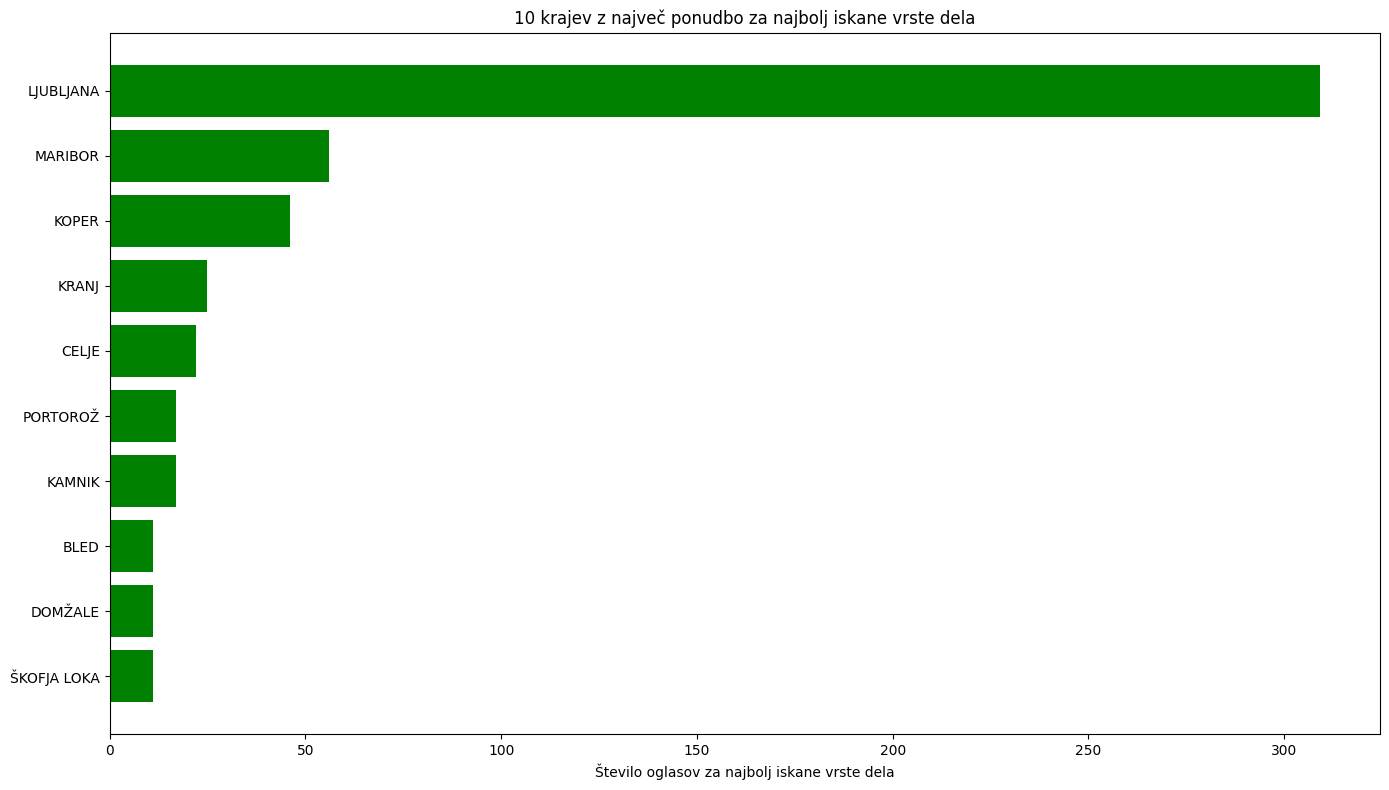

In [36]:

df = pd.read_csv('podatki_dela.csv')
df['Prosta mesta'] = pd.to_numeric(df['Prosta mesta'], errors='coerce')


vsota_mest = df.groupby('Vrsta dela')['Prosta mesta'].sum()
stevilo_oglasov = df.groupby('Vrsta dela').size()
statistika = pd.DataFrame({
    'št_oglasov': stevilo_oglasov,
    'vsota_prostih_mest': vsota_mest
})

statistika_clean = statistika[statistika['vsota_prostih_mest'] > 0]

# 6. Prvih in zadnjih 10 po vsoti prostih mest
top_10_iskana = statistika_clean.sort_values('vsota_prostih_mest', ascending=False).head(10)
top_10_iskana = top_10_iskana.sort_values(by='vsota_prostih_mest', ascending=True)
bottom_10_iskana = statistika_clean.sort_values('vsota_prostih_mest', ascending=True).head(10)
bottom_10_iskana = bottom_10_iskana.sort_values(by='vsota_prostih_mest', ascending=False)

# 7. Filtriramo originalno tabelo na top 10 vrst dela in izračunamo kraje
top_10_vrste = top_10_iskana.index
filtrirana_tabela = df[df['Vrsta dela'].isin(top_10_vrste)]
kraji_ponudba = filtrirana_tabela.groupby('Kraj').size().sort_values(ascending=False).head(10).sort_values(ascending=True)

# 8. Top 10 najbolj iskanih vrst dela
plt.figure(figsize=(14, 8))
plt.barh(range(len(top_10_iskana)), top_10_iskana['vsota_prostih_mest'].values, color='blue')
plt.yticks(range(len(top_10_iskana)), top_10_iskana.index)
plt.xlabel('Število prostih delovnih mest')
plt.title('10 najbolj iskanih vrst dela')
plt.tight_layout()
plt.show()

# 9. Bottom 10 najmanj iskanih vrst dela
bottom_10_iskana = bottom_10_iskana.reset_index()
print("NAJMANJ ISKANA DELA: \n")
for vrsta in bottom_10_iskana['Vrsta dela']:
    print(f"{vrsta}")

# 10. Top 10 krajev z največ ponudbo za najbolj iskane vrste dela
plt.figure(figsize=(14, 8))
plt.barh(range(len(kraji_ponudba)), kraji_ponudba.values, color='green')
plt.yticks(range(len(kraji_ponudba)), kraji_ponudba.index)
plt.xlabel('Število oglasov za najbolj iskane vrste dela')
plt.title('10 krajev z največ ponudbo za najbolj iskane vrste dela')
plt.tight_layout()
plt.show()